In [ ]:
!pip install bert_score
!pip install rouge-score

In [28]:
import bert_score
from rouge_score import rouge_scorer

In [32]:
def score_each(hyps, refs, metric="bertscore", model_type="microsoft/deberta-xlarge-mnli"):
    """
    Compute the bert score or rough score for hypothesis and reference pairs.

    Args:
        hyps: a list of string, hypothesis
        refs: a list of string, references
        metric: metric to compute, bertsocre, rouge1, rouge2, rougeL, rougeLsum
        model_type: model to cacluate bertscore

    Returns:
        precisions, recalls, fmeasures
    """

    if metric == "bertscore":
        precisions, recalls, fmeasures = bert_score.score(hyps, refs, model_type=model_type, lang="en", verbose=True)
        return precisions.tolist(), recalls.tolist(), fmeasures.tolist()
    elif metric in ["rouge1", "rouge2", "rougeL", "rougeLsum"]:
        scorer = rouge_scorer.RougeScorer([metric])
        precisions, recalls, fmeasures = [], [], []
        # for each of the hypothesis and reference documents pair
        for (h, r) in zip(hyps, refs):
            # computing the ROUGE
            score = scorer.score(h, r)
            # separating the measurements
            precision, recall, fmeasure = score[metric]
            precisions.append(precision)
            recalls.append(recall)
            fmeasures.append(fmeasure)
        return precisions, recalls, fmeasures
    else:
        raise ValueError('Metric is not implemented.')

def score(hyps, ref, metric="bertscore", model_type="microsoft/deberta-xlarge-mnli", lang="en"):
    """
    Compute the bert score or rough score given a gold summary and a list of summaries generated by models.

    Args:
        hyps: a list of summaries generated by models
        ref: a gold summary
        metric: metric to compute, bertsocre, rouge1, rouge2, rougeL, rougeLsum
        model_type: model to cacluate bertscore

    Returns:
        precisions, recalls, fmeasures
    """
    refs = [ref] * len(hyps)
    return score_each(hyps, refs, metric, model_type)

def visualize_bert_score(hyps, ref, rescale_with_baseline=True, model_type="microsoft/deberta-xlarge-mnli"):
    """
    Visualize the bert score given a gold summary and a list of summaries generated by models.

    Args:
        hyps: a list of summaries generated by models
        ref: a gold summary
        rescale_with_baseline: metric to compute, bertsocre, rouge1, rouge2, rougeL, rougeLsum
        model_type: model to cacluate contextualized embeddings
    """ 
    for hyp in hyps:
        bert_score.plot_example(hyp, ref, model_type=model_type, lang="en", rescale_with_baseline=rescale_with_baseline)

In [31]:
hyps = ["it is freezing today", "it is hot today", "today temperature is -20 degrees in celsius"]
ref = "The weather is cold today"

bert_score_precisions, bert_score_recalls, bert_score_fmeasures = score(hyps, ref, metric="bertscore", model_type="roberta-large")

Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.43 seconds, 2.10 sentences/sec


In [34]:
rouge1_precisions, rouge1_recalls, rouge1_fmeasures = score(hyps, ref, metric="rouge1")

In [35]:
print("ref:", ref)
print("hyps:", hyps)
print(f"F1 rouge1 score: {rouge1_fmeasures}")
print(f"F1 bert score using roberta-large: {bert_score_fmeasures}")

ref: The weather is cold today
hyps: ['it is freezing today', 'it is hot today', 'today temperature is -20 degrees in celsius']
F1 rouge1 score: [0.4444444444444445, 0.4444444444444445, 0.3333333333333333]
F1 bert score using roberta-large: [0.9373618960380554, 0.9460169672966003, 0.8473145365715027]


Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


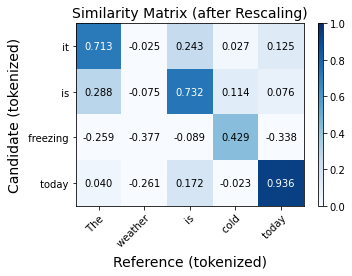

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


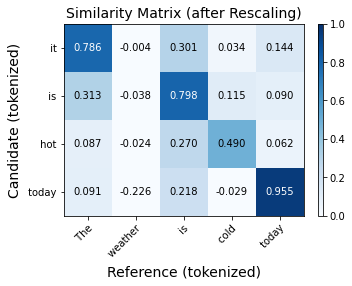

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


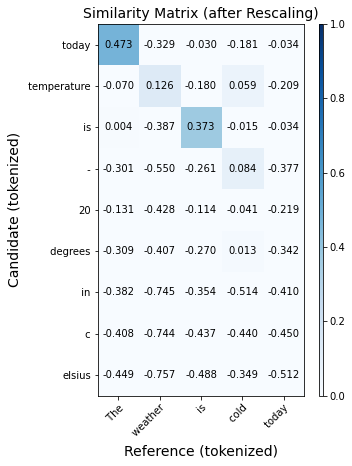

In [36]:
visualize_bert_score(hyps, ref, model_type="roberta-large")

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.7/dist-packages/bert_score/score.py:301: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


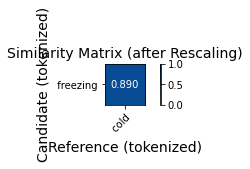

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


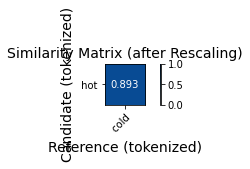

In [37]:
visualize_bert_score(["freezing", "hot"], "cold", model_type="roberta-large")